# Чтение данных

Загрузим данные и необходимые библиотеки для работы с данными

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

df=pd.read_csv('/kaggle/input/loan-approval-prediction-dataset/loan_approval_dataset.csv')
df.shape

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


(4269, 13)

В датасете присутствует 4269 записей, 13 столбцов, так же среди данных нет дубликатов

In [2]:
df = df.drop_duplicates()
df.shape

(4269, 13)

In [3]:
df.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [4]:
df.columns

Index(['loan_id', ' no_of_dependents', ' education', ' self_employed',
       ' income_annum', ' loan_amount', ' loan_term', ' cibil_score',
       ' residential_assets_value', ' commercial_assets_value',
       ' luxury_assets_value', ' bank_asset_value', ' loan_status'],
      dtype='object')

In [5]:
df.columns = [i.replace(" ","") for i in df.columns] #уберем лишние пробелы из названий столбцов
df.columns

Index(['loan_id', 'no_of_dependents', 'education', 'self_employed',
       'income_annum', 'loan_amount', 'loan_term', 'cibil_score',
       'residential_assets_value', 'commercial_assets_value',
       'luxury_assets_value', 'bank_asset_value', 'loan_status'],
      dtype='object')

Присутствует большое количество данных с высоким стандартным отклонением

In [6]:
df.describe()

,loan_id,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
count,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4.269000e+03,4.269000e+03
mean,2135.000000,2.498712,5.059124e+06,1.513345e+07,10.900445,599.936051,7.472617e+06,4.973155e+06,1.512631e+07,4.976692e+06
std,1232.498479,1.695910,2.806840e+06,9.043363e+06,5.709187,172.430401,6.503637e+06,4.388966e+06,9.103754e+06,3.250185e+06
min,1.000000,0.000000,2.000000e+05,3.000000e+05,2.000000,300.000000,-1.000000e+05,0.000000e+00,3.000000e+05,0.000000e+00
25%,1068.000000,1.000000,2.700000e+06,7.700000e+06,6.000000,453.000000,2.200000e+06,1.300000e+06,7.500000e+06,2.300000e+06
50%,2135.000000,3.000000,5.100000e+06,1.450000e+07,10.000000,600.000000,5.600000e+06,3.700000e+06,1.460000e+07,4.600000e+06
75%,3202.000000,4.000000,7.500000e+06,2.150000e+07,16.000000,748.000000,1.130000e+07,7.600000e+06,2.170000e+07,7.100000e+06
max,4269.000000,5.000000,9.900000e+06,3.950000e+07,20.000000,900.000000,2.910000e+07,1.940000e+07,3.920000e+07,1.470000e+07


В данном датасете отсутствуют данные в которых не указано значение

In [7]:
df.isnull().sum()

loan_id                     0
no_of_dependents            0
education                   0
self_employed               0
income_annum                0
loan_amount                 0
loan_term                   0
cibil_score                 0
residential_assets_value    0
commercial_assets_value     0
luxury_assets_value         0
bank_asset_value            0
loan_status                 0
dtype: int64

# Разведочный анализ данных

Построим гистограмму показывающую число людей, которым одобрили кредит и людей, которым не одобрили

Как можно заметить, число людей, с одобренным кредитом превышает число людей, которым кредит не одобрили

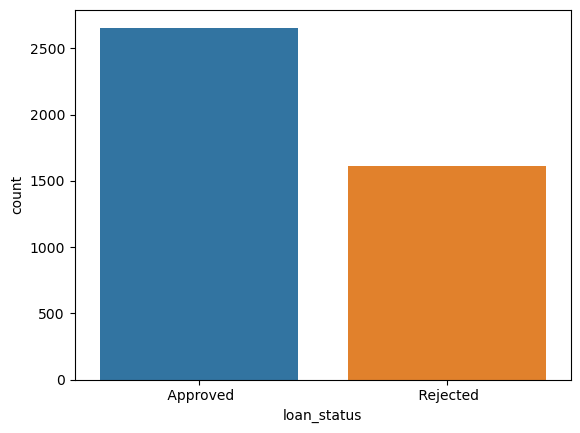

In [8]:
sns.countplot(x='loan_status',data=df)
plt.show()

Вычислим точное количество людей, которым одобрили заявку, и тем которым нет, а также найдем процентнтное соотношение

In [9]:
print(df.loan_status.value_counts())
print(df.loan_status.value_counts(normalize='true'))

 Approved    2656
 Rejected    1613
Name: loan_status, dtype: int64
 Approved    0.62216
 Rejected    0.37784
Name: loan_status, dtype: float64


Число людей имеющих высшее образование и число людей без высшего образования, а так же их процентное соотношение

Исходя из данных видно, что число людей с разным трудовым статусом и разным образованием различается незначительно


In [10]:
print("Образование")
print(df.education.value_counts())
print(df.education.value_counts(normalize='true'))

Образование
 Graduate        2144
 Not Graduate    2125
Name: education, dtype: int64
 Graduate        0.502225
 Not Graduate    0.497775
Name: education, dtype: float64


In [11]:
print("Трудовой статус")
print(df.self_employed.value_counts())
print(df.self_employed.value_counts(normalize='true'))

Трудовой статус
 Yes    2150
 No     2119
Name: self_employed, dtype: int64
 Yes    0.503631
 No     0.496369
Name: self_employed, dtype: float64


Проверим являют ли эти признаки на решение о выдачи кредита

Гистограмма №1 показывает решение о выдаче кредита людям, которые работают по найму и для самозанятых

Гистограмма №2 показывает решение о выдаче кредита людям с высшим образованием и для людям без высшего образования

Из представленных гистограмм можно сделать вывод, что ни трудовой статус, ни образования не оказывают особого влияния на решение о выдаче кредита

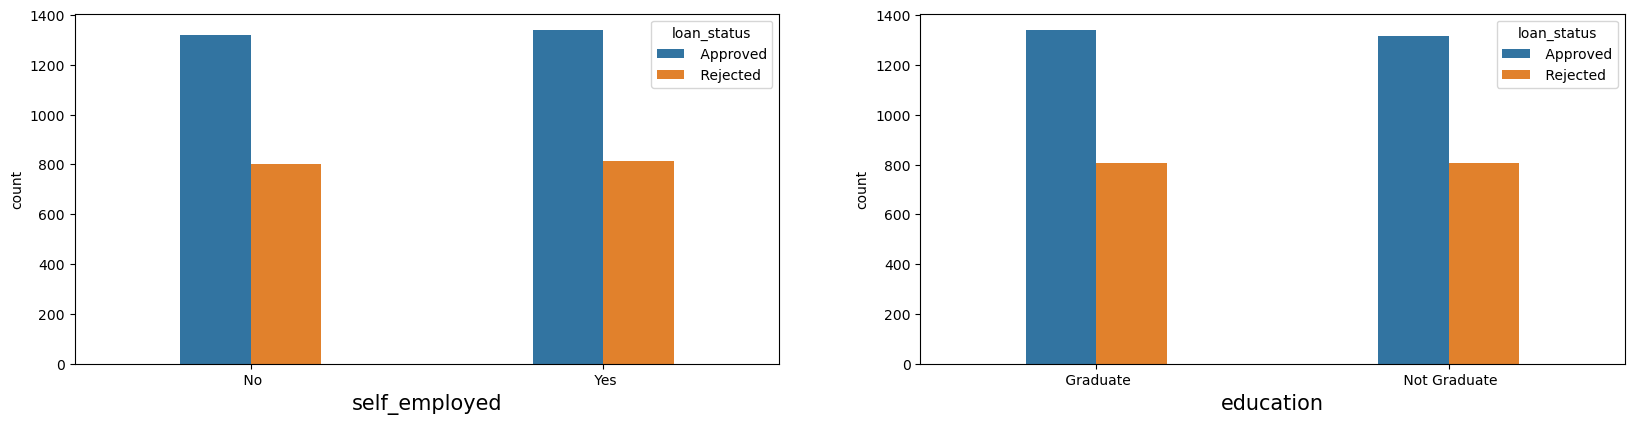

In [12]:
plotnum = 1
plt.figure(figsize = (20,10))
for i in ['self_employed','education']:
    ax = plt.subplot(2,2,plotnum)
    sns.countplot(data=df, x=str(i), hue=df['loan_status'], width=0.4)
    plt.xlabel(i, fontdict={'size':15})
    plotnum +=1

Рейтинг CIBIL - это трехзначное число, которое характерезует кредитную историю заявителя. Рейтинг CIBIL предоставляется индийской компанией TransUnion CIBIL.

Рейтинг может находится в диапазоне от 300 до 900, где 900 наилучшее значение. Указывает на вероятность кредитного дефолта.

Используем метод describe, чтобы получить общее число записей о кредитном рейтинг, среднее значение, cреднеквадратическое отклонение, минимальное значение, 25-й и 75-1 квантили, медиану и максимальное значение признака

In [13]:
df['cibil_score'].describe()

count    4269.000000
mean      599.936051
std       172.430401
min       300.000000
25%       453.000000
50%       600.000000
75%       748.000000
max       900.000000
Name: cibil_score, dtype: float64

Построим гистограмму показывающую зависимость решения о выдаче кредита, от кредитного рейтинга

Для людей, чей рейтинг ниже 500 число отказов значительно превышает число согласий, крайне низкая вероятность получения кредита с таким рейтингом

В диапазоне от 500 до 600 число согласий на 6% превышает число отказов, практически каждая вторая заявка является отказом

Начиная от значения 600 и выше вероятность получения кредита значительно повышается

Можем сделать вывод, что основополагающим фактором в одобрении кредита является кредитная история заявителя

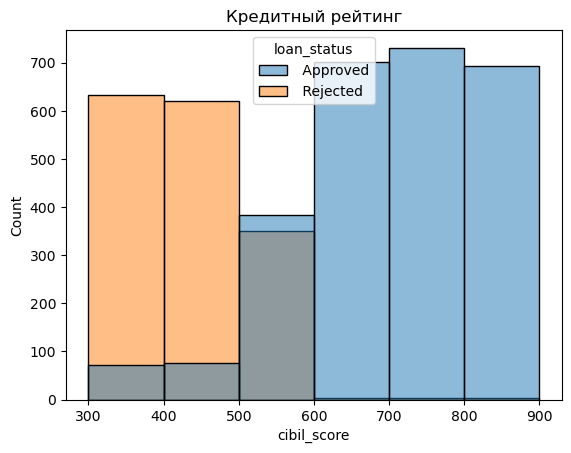

In [14]:
sns.histplot(x='cibil_score',bins=6,hue='loan_status', data=df)
plt.title('Кредитный рейтинг')
plt.show()

In [15]:
df[(df['cibil_score'] >= 500) & (df['cibil_score'] <= 600)]['loan_status'].value_counts(normalize='true')

 Approved    0.52957
 Rejected    0.47043
Name: loan_status, dtype: float64

Для удобства дальнейшей обработки приведем текстовые значения в признаках в числа

In [16]:
# df['loan_status'] = df['loan_status'].replace([' Approved', ' Rejected'], [1,0])
df['self_employed'] = df['self_employed'].replace([' Yes', ' No'], [1,0])
df['education'] = df['education'].replace([' Graduate', ' Not Graduate'], [1,0])

Построим тепловую карту данных

Имеется большое количество признаков с низким влиянием на другие признаки. 

Можно заметить сильную связь между размером дохода и размером кредита. Так же очевидна связь между уровнем дохода и стоимостью различных активов заявителя.

/tmp/ipykernel_80/3243999475.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_heat = df.corr()


<Axes: >

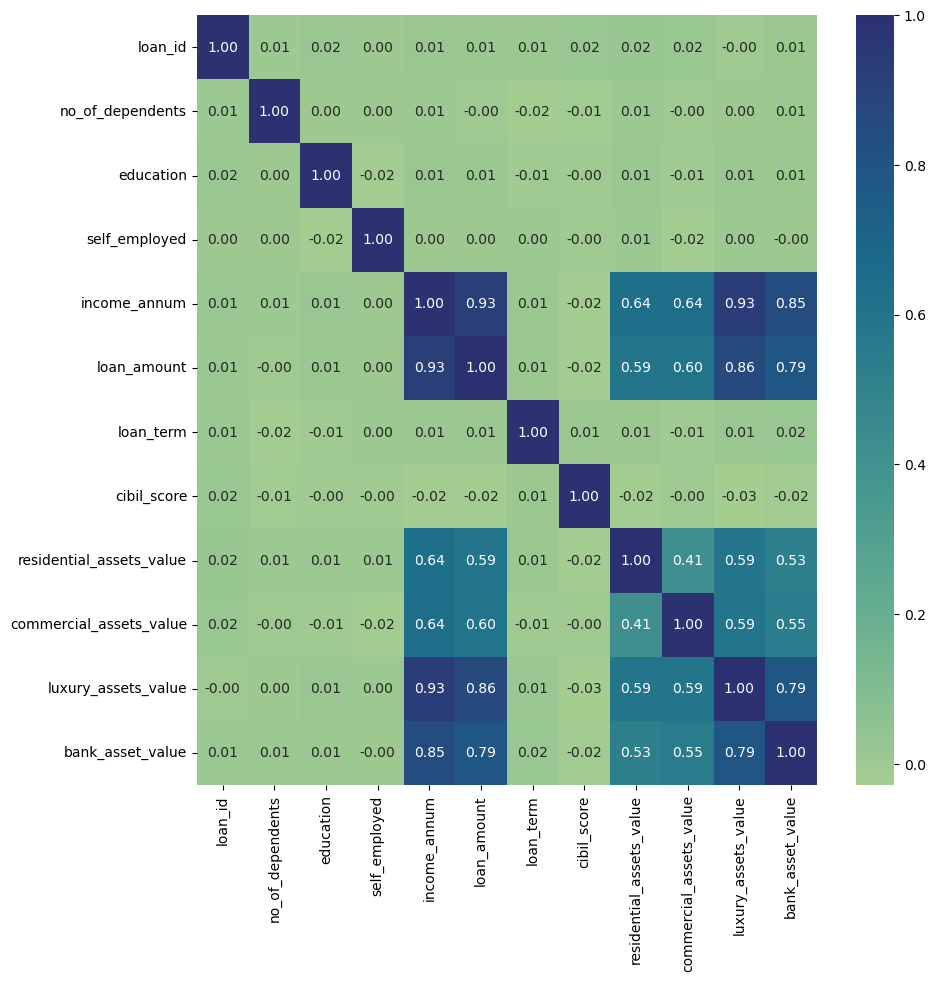

In [17]:
df_heat = df.corr()
plt.figure(figsize=(10,10))
sns.heatmap(df_heat, annot=True, cmap='crest',fmt='.2f')

Построим точечную диаграмму показывающую влияние кредитного рейтинга и объема кредита на решение по кредиту

Видно, что объем кредита не оказывает особого влияние на решение

<Axes: xlabel='loan_amount', ylabel='cibil_score'>

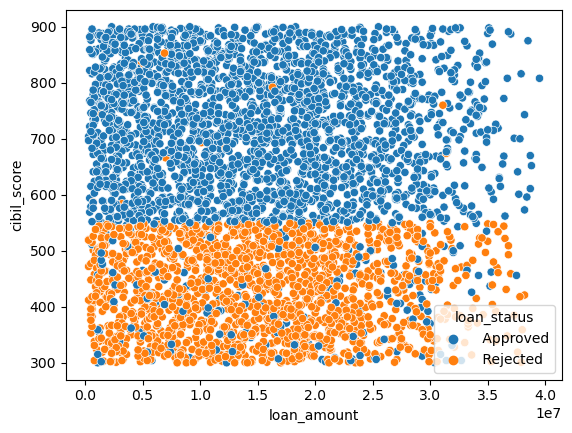

In [18]:
sns.scatterplot(x=df['loan_amount'], y=df['cibil_score'], hue=df['loan_status'])

Построим точечную диаграмму показывающую влияние кредитного рейтинга и годового дохода на решение по кредиту

Уровень дохода показывает такие же результаты, что и объем кредита

<Axes: xlabel='income_annum', ylabel='cibil_score'>

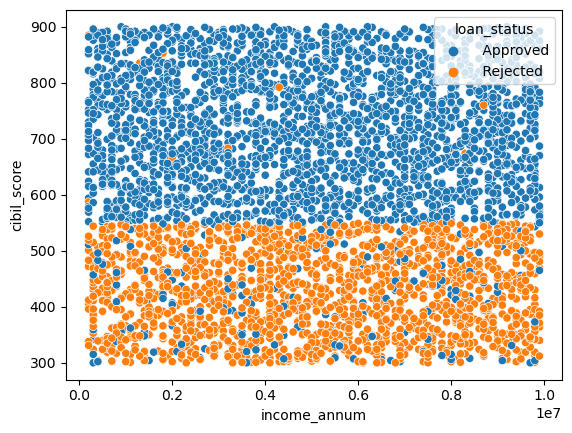

In [19]:
sns.scatterplot(x=df['income_annum'], y=df['cibil_score'], hue=df['loan_status'])

Построим точечную диаграмму показывающую влияние кредитного рейтинга и годового дохода на решение по кредиту

На данной диаграмме видно, что банк готов чаще давать кредит на короткий срок, людям с низким кредитным рейтингом

<Axes: xlabel='cibil_score', ylabel='loan_term'>

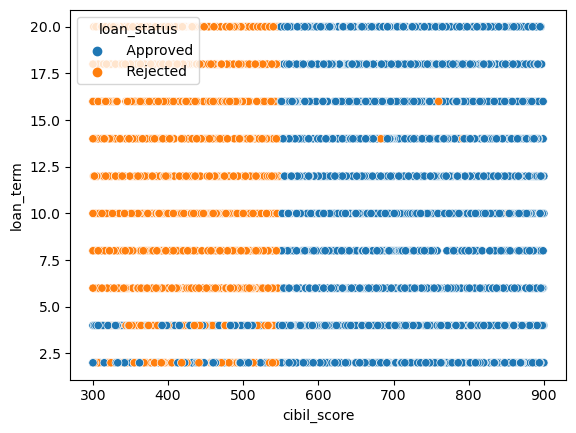

In [20]:
sns.scatterplot(x=df['cibil_score'], y=df['loan_term'], hue=df['loan_status'])

# Обработка данных

In [21]:
df['loan_status'] = df['loan_status'].replace([' Approved', ' Rejected'], [1,0])

In [22]:
X = df.drop('loan_status', axis=1)
y = df['loan_status']

Для масштабирования данных воспользуемся функцией нормализации, так как данные не следуют нормальному распределению

In [23]:
from sklearn.preprocessing import MinMaxScaler
normalization  = MinMaxScaler()
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2,stratify=y)
x_train=normalization .fit_transform(x_train)
x_test=normalization .fit_transform(x_test)

# Построение моделей

Импортируем функции необходимые для оценки моделей, а так же функции для построения моделей

In [24]:
from sklearn.metrics import classification_report, accuracy_score
import time 

In [25]:
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

In [26]:
xgboost = XGBClassifier()

start = time.time()

xgboost.fit(x_train, y_train)
pred = xgboost.predict(x_test)
print(classification_report(y_test, pred))
accuracy = accuracy_score(y_test, pred)
print("Точность градиентного бустинга:", accuracy)

end = time.time() - start
print(end)

              precision    recall  f1-score   support

           0       0.97      0.97      0.97       323
           1       0.98      0.98      0.98       531

    accuracy                           0.98       854
   macro avg       0.98      0.98      0.98       854
weighted avg       0.98      0.98      0.98       854

Точность градиентного бустинга: 0.977751756440281
0.2922046184539795


In [27]:
lr = LogisticRegression()

start = time.time()

lr.fit(x_train, y_train)
pred = lr.predict(x_test)
accuracy = accuracy_score(y_test, pred)
print(classification_report(y_test, pred))
print("Точность логистической регрессии:", accuracy)

end = time.time() - start
print(end)

              precision    recall  f1-score   support

           0       0.90      0.92      0.91       323
           1       0.95      0.94      0.94       531

    accuracy                           0.93       854
   macro avg       0.92      0.93      0.93       854
weighted avg       0.93      0.93      0.93       854

Точность логистической регрессии: 0.9297423887587822
0.0830221176147461


In [28]:
rf = RandomForestClassifier()

start = time.time()

rf.fit(x_train, y_train)
pred = rf.predict(x_test)
accuracy = accuracy_score(y_test, pred)
print(classification_report(y_test, pred))
print("Точность случайного леса:", accuracy)

end = time.time() - start
print(end)

              precision    recall  f1-score   support

           0       0.97      0.96      0.97       323
           1       0.98      0.98      0.98       531

    accuracy                           0.98       854
   macro avg       0.98      0.97      0.97       854
weighted avg       0.98      0.98      0.98       854

Точность случайного леса: 0.9754098360655737
0.8960115909576416
